# Round 3
# Data Set - Facebook network


## Dataset Description :
The facebook network contains 4039 users. An edge exists between 2 users if they are friend of each other. This is an undirected graph with a total of 88234 edges.


### Finding Random Sample

Since the original network is huge , we used a random sample in order to get the inferences.

In [8]:
#finding random sample
import os
import random

filename = 'facebook.txt'

result = []
f = open("facebook1.txt", "a")

with open(filename) as fh:
    data = fh.readlines()
    for line in data:
        if line:
            words = line.split()
            result.append(words)

sample = random.sample(result, 5000)

for item in sample:
    f.write(item[0] + "   " + item[1] + "\n")

Now using the above random sample , we will read the graph G from the list of edges ('facebook1.txt') and find the general information about the graph.

In [1]:
import networkx as nx

#reading graph from list of edges
G=nx.read_edgelist('facebook1.txt',nodetype=int,create_using=nx.Graph())

print(" ")

#general information about the graph
print (nx.info(G))

 
Name: 
Type: Graph
Number of nodes: 3127
Number of edges: 6812
Average degree:   4.3569


#### Basic Information about graph:
From here , we can see that the graph generated has 3127 nodes and 6812 edges. It is a directed graph and average degree is 4.3569.

### Graph Representation


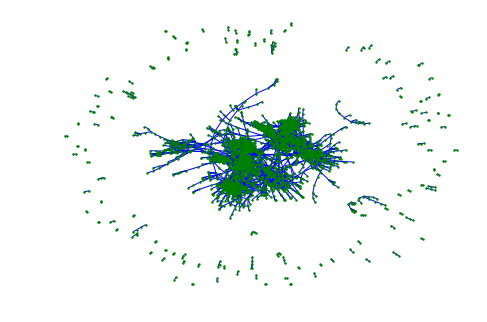

In [10]:
import matplotlib.pyplot as plt

# drawing graph
nx.draw(G, pos=None, node_color='g', edge_color='b',node_size=2)
plt.show()
#print (nx.is_connected(G))

In the graph , nodes are represented by green colour and directed edges are represented by blue colour.










# Community detection











 There are a variety of community detection algorithms. When detecting communities, we are interested in detecting communities with either (1) specific members or (2) specific forms of communities. We denote the former as member-based community detection and the latter as group-based community detection.



### Hierarchial Clustering

Hierarchical clustering generates community hierarchies. Initially, n nodes are considered as either 1 or n communities in hierarchical clustering.These communities are gradually merged or split (agglomerative or divisive
hierarchical clustering algorithms), depending on the type of algorithm,until the desired number of communities are reached.


We have used Girvan-Newman Algorithm here which is a divisive clustering algorithm. Since we have total 3124 nodes in our sampled graph , we have taken k=200 , i.e., we want to have 200 clusters in total.

In [ ]:
##comp = nx.algorithms.community.centrality.girvan_newman(G)
import itertools
k = 200
#q=[]
comp = nx.algorithms.community.centrality.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities)) 
   # print "\n"


([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 34, 40, 45, 48, 53, 55, 56, 57, 58, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 107, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 136, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 415, 416, 417, 418, 419, 420, 422, 423, 425, 426, 428, 429, 430, 431, 432, 435, 436, 438, 439, 440, 442, 444

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 58, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 136, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346, 951, 1465, 1577, 1618, 1718, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1923, 1925, 1926, 1927, 1928, 1929, 1930, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1966, 1968, 1970, 1971, 19

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 107, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 107, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 414, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 415, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 415, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 415, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 415, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 353, 354, 355, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 380, 381, 387, 388, 389, 391, 392, 395, 396, 397, 398, 400, 402, 403, 404, 407, 408, 409, 412, 415, 41

([0, 1, 3, 5, 9, 13, 21, 24, 25, 26, 29, 30, 40, 45, 48, 53, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 94, 96, 98, 101, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 158, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 266, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 299, 302, 303, 304, 313, 314, 315, 317, 318, 320, 322, 323, 325, 328, 329, 330, 332, 334, 342, 344, 345, 346], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [28, 116], [34, 348, 350, 352, 354, 355, 359, 360, 361, 362, 365, 366, 367, 369, 370, 372, 373, 374, 375, 376, 378, 381, 387, 388, 391, 392, 395, 396, 397, 400, 402, 403, 404, 407, 408, 409, 412, 415, 416, 417, 418, 419, 420, 422, 425, 42

([0, 1, 3, 5, 9, 13, 21, 25, 26, 29, 30, 40, 45, 55, 56, 57, 59, 62, 65, 66, 67, 69, 72, 75, 77, 88, 92, 96, 98, 102, 104, 109, 112, 113, 118, 119, 122, 123, 127, 128, 131, 133, 134, 142, 143, 149, 156, 161, 166, 169, 170, 172, 173, 181, 185, 186, 188, 190, 191, 194, 197, 199, 200, 203, 204, 205, 211, 212, 213, 217, 221, 222, 223, 224, 227, 228, 231, 232, 234, 236, 238, 239, 240, 241, 244, 246, 248, 249, 251, 252, 253, 257, 261, 265, 268, 271, 272, 276, 277, 280, 281, 282, 284, 285, 290, 291, 292, 295, 297, 303, 304, 313, 314, 315, 318, 320, 322, 323, 325, 328, 329, 332, 334, 342, 344, 345], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [24, 48, 53, 94, 101, 158, 266, 299, 302, 317, 330, 346], [28, 116], [34, 348, 350, 352, 354, 355, 359, 360, 361, 362, 365, 366, 367, 369, 370, 372, 373, 374, 375, 376, 378, 381, 387, 388, 391, 392, 395, 396, 397, 400, 402, 403, 404, 407, 408, 409, 412, 415, 416, 417, 418, 419, 420, 422, 425, 

([0, 45, 55, 59, 62, 92, 102, 112, 123, 131, 143, 149, 166, 173, 181, 191, 194, 199, 205, 217, 221, 227, 228, 234, 238, 240, 241, 244, 253, 261, 282, 285, 292, 303, 314, 328], [1, 3, 5, 9, 13, 21, 25, 26, 29, 30, 40, 56, 57, 65, 66, 67, 69, 72, 75, 77, 88, 96, 98, 104, 109, 113, 118, 119, 122, 127, 128, 133, 134, 142, 156, 161, 169, 170, 172, 185, 186, 188, 190, 197, 200, 203, 204, 211, 212, 213, 222, 223, 224, 231, 232, 236, 239, 246, 248, 249, 251, 252, 257, 265, 268, 271, 272, 276, 277, 280, 281, 284, 290, 291, 295, 297, 304, 313, 315, 318, 320, 322, 323, 325, 329, 332, 334, 342, 344, 345], [7, 129, 339], [14, 20, 41, 111, 115, 137, 162, 214, 226, 326, 337, 343], [17, 144], [19, 138], [23, 237], [24, 48, 53, 94, 101, 158, 266, 299, 302, 317, 330, 346], [28, 116], [34, 348, 350, 352, 354, 355, 359, 360, 361, 362, 365, 366, 367, 369, 370, 372, 373, 374, 375, 376, 378, 381, 387, 388, 391, 392, 395, 396, 397, 400, 402, 403, 404, 407, 408, 409, 412, 415, 416, 417, 418, 419, 420, 422, 425

This shows set of all clusters starting from 1 cluster till 200 clusters are made

### Clique Percolation Method (CPM)

Given parameter k, the method starts by finding all cliques of size k. Then a graph is generated (clique graph) where all cliques are represented as nodes, and cliques that share k − 1 vertices are connected via edges. Communities are then found by reporting the connected components of this graph.

In [3]:
#fixing k=4
from networkx.algorithms.community import k_clique_communities
c = list(k_clique_communities(G, 3))

#printing all the communities
print c

[frozenset([1017, 1793, 1538, 1539, 1668, 1267, 1004, 1391, 1491, 1717, 1782, 1559, 1721, 1211, 1181, 1663]), frozenset([2410, 2395, 2140, 2109]), frozenset([67, 40, 169, 334]), frozenset([1984, 2275, 2532, 2348, 2124, 2253, 2190, 2095, 2257, 2578, 2115, 2261, 2244, 2266, 2043, 2526]), frozenset([2384, 2344, 2102, 2390, 1912, 1577, 2509]), frozenset([2560, 2306, 2307, 2564, 2309, 2433, 2059, 2064, 2578, 2323, 2324, 2073, 2074, 2331, 2590, 2593, 2339, 2340, 2600, 2602, 2347, 2093, 2607, 2352, 2354, 2611, 2615, 2619, 2229, 2624, 2370, 2630, 2631, 2122, 2123, 2381, 2638, 2131, 2489, 2532, 2395, 2140, 2654, 2655, 2404, 2407, 2410, 2414, 2165, 2623, 2118, 2430, 2112, 2374, 2184, 1938, 1941, 2200, 2201, 1946, 2460, 2586, 1953, 2210, 2467, 2469, 2213, 2216, 2218, 2220, 2290, 1971, 2484, 2485, 2233, 2237, 1985, 1986, 2244, 1989, 1993, 2507, 2253, 2005, 2521, 2526, 2271, 2043, 2276, 2539, 2542, 2543, 2033, 2546, 2037, 2088, 2553, 2554, 2299, 2090, 2046]), frozenset([1120, 1576, 1404]), frozense

Hered,we can observe that all cliques of size k = 3 have been identified and cliques that share
k−1 = 2 nodes are connected. All the obtained communities are given above.